In [34]:
import numpy as np
import math
import json
import matplotlib.pyplot as plt

In [35]:
truthTable_s_list = []
truthTable_s_list.append([0, 1, 1, 0, 1, 0, 0, 1]) # exact Serial [1]
truthTable_s_list.append([1, 1, 1, 0, 1, 1, 0, 0]) # Serial Aprox [2]
truthTable_s_list.append([1, 1, 1, 0, 1, 1, 0, 0]) # SIAFA 1 [3]
truthTable_s_list.append([1, 1, 1, 0, 1, 0, 0, 0]) # SIAFA 2 [4]
truthTable_s_list.append([1, 1, 1, 1, 1, 0, 0, 0]) # SIAFA 3 [5]
truthTable_s_list.append([1, 1, 1, 0, 1, 0, 1, 0]) # SIAFA 4 [6]
truthTable_s_list.append([0, 1, 1, 0, 1, 0, 0, 1]) # exact Semi Serial [7]
truthTable_s_list.append([1, 1, 1, 0, 0, 0, 0, 0]) # Semi Serial Aprox [8]
truthTable_s_list.append([0, 1, 1, 0, 1, 0, 0, 1]) # exact parallel [9]
truthTable_s_list.append([0, 1, 1, 0, 1, 0, 0, 1]) # exact Semi Parallel [10]
truthTable_s_list.append([1, 1, 1, 1, 1, 1, 0, 1]) # own Aprox [11]
# truthTable_s_list.append([1, 1, 1, 0, 1, 1, 1, 1]) # own 3Memristors [12]
truthTable_s_list.append([1, 1, 1, 0, 0, 0, 0, 0]) # C51 paper [13]


truthTable_c_list = []
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 1, 1]) # exact Serial [1]
truthTable_c_list.append([0, 0, 0, 1, 0, 0, 1, 1]) # Serial Aprox [2]
truthTable_c_list.append([0, 0, 0, 1, 0, 0, 1, 1]) # SIAFA 1 [3]
truthTable_c_list.append([0, 1, 0, 1, 0, 1, 1, 1]) # SIAFA 2 [4]
truthTable_c_list.append([0, 0, 0, 0, 0, 1, 1, 1]) # SIAFA 3 [5]
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 0, 1]) # SIAFA 4 [6]
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 1, 1]) # exact Semi Serial [7]
truthTable_c_list.append([0, 0, 0, 1, 1, 1, 1, 1]) # Serial Aprox [8]
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 1, 1]) # exact parallel [9]
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 1, 1]) # exact Semi Parallel [10]
truthTable_c_list.append([0, 1, 0, 1, 0, 1, 1, 1]) # own Aprox [11]
# truthTable_c_list.append([0, 1, 0, 1, 0, 1, 0, 1]) # own 3Memristors [12]
truthTable_c_list.append([0, 0, 0, 1, 1, 1, 1, 1]) # C51 paper [13]

nameApprox_list = []
nameApprox_list.append("exact Serial [1]")
nameApprox_list.append("Serial Aprox [2]")
nameApprox_list.append("SIAFA 1 [3]")
nameApprox_list.append("SIAFA 2 [4]")
nameApprox_list.append("SIAFA 3 [5]")
nameApprox_list.append("SIAFA 4 [6]")
nameApprox_list.append("exact Semi Serial [7]")
nameApprox_list.append("Serial Aprox [8]")
nameApprox_list.append("exact parallel [9]")
nameApprox_list.append("exact Semi Parallel [10]")
nameApprox_list.append("own Aprox [11]")
# nameApprox_list.append("own 3Memristors [12]")
nameApprox_list.append("C51 paper [13]")

edgeDetectionKernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
blurrKernel = np.array([[1,2,1],[2,4,2],[1,2,1]])

kernel_list = []
kernel_list.append(blurrKernel)
kernel_list.append(edgeDetectionKernel)

kernelname_list = []
kernelname_list.append("edge Detection")
kernelname_list.append("blurring")

# write data to json file
# Create a dictionary to hold the parsed data
loaded_dict = {}


# Populate the dictionary
for i, name in enumerate(nameApprox_list):
    loaded_dict[name] = {"s": truthTable_s_list[i], "c": truthTable_c_list[i], "med": list(), "mred": list(), "nmed": list()}


In [36]:

def Adder(a, b, c, approxAlgo = "exact Semi Parallel [10]"):
    if a==0 and b==0 and c==0:
        s = loaded_dict[approxAlgo]["s"][0]
        c_out = loaded_dict[approxAlgo]["c"][0]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][0]
    elif a==0 and b==0 and c==1:
        s = loaded_dict[approxAlgo]["s"][1]
        c_out = loaded_dict[approxAlgo]["c"][1]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][1]
    elif a==0 and b==1 and c==0:
        s = loaded_dict[approxAlgo]["s"][2]
        c_out = loaded_dict[approxAlgo]["c"][2]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][2]
    elif a==0 and b==1 and c==1:
        s = loaded_dict[approxAlgo]["s"][3]
        c_out = loaded_dict[approxAlgo]["c"][3]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][3]
    elif a==1 and b==0 and c==0:
        s = loaded_dict[approxAlgo]["s"][4]
        c_out = loaded_dict[approxAlgo]["c"][4]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][4]
    elif a==1 and b==0 and c==1:
        s = loaded_dict[approxAlgo]["s"][5]
        c_out = loaded_dict[approxAlgo]["c"][5]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][5]
    elif a==1 and b==1 and c==0:
        s = loaded_dict[approxAlgo]["s"][6]
        c_out = loaded_dict[approxAlgo]["c"][6]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][6]
    elif a==1 and b==1 and c==1:
        s = loaded_dict[approxAlgo]["s"][7]
        c_out = loaded_dict[approxAlgo]["c"][7]
        # energy_consumption = loaded_dict[approxAlgo]["energy"][7]
    return s, c_out

def MyNbitAdder(a, b, Algo, Bit):
    try:
        #convert to binary and cut off the first two indices (they dont belong to the number but indicate that it is binary)
        minusABFlag = False

        if a >= 0 and b >= 0:    
            a_bin = bin(a)[2:]
            b_bin = bin(b)[2:]
        elif a < 0 and b >= 0:
            a_bin = decimal2TwoComplement(a)
            b_bin = bin(b)[2:]
        elif a >= 0 and b < 0:
            a_bin = bin(a)[2:]
            b_bin = decimal2TwoComplement(b)
        elif a < 0 and b < 0:
            minusABFlag = True
            a_bin = bin(a)[3:]
            b_bin = bin(b)[3:]
        else:
            print('Error')
        
        #reverse order of bytes for the adder
        rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
        
        #We want to make the to bytes to equalt length such that we can add 
        #--> add zeros to the shortest list until it is the same as the longest
        if a >= 0 or minusABFlag: 
            rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [0]
        else: 
            rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [1]
        
        if b >= 0 or minusABFlag:
            rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [0]
        else:
            rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [1]

        carry_over  = 0
        total_sum   = 0
        #############################################
        approx_until = Bit #change this if u want to approximate the first bits by an approximate adder
        #############################################
        sum_list = []
        #we want to do a bitwise addition
        for index, (bit1, bit2) in enumerate(zip(rev_a, rev_b) ):
            if index <= approx_until or 'exact' in Algo:
                #use approx_adder
                sum_element, carry_over = Adder(a=int(bit1), b=int(bit2), c=int(carry_over), approxAlgo=Algo) 
            else:
                #use exact_adder
                    sum_element, carry_over = Adder(a=int(bit1), b=int(bit2), c=int(carry_over))    
            
            sum_list.append(int(sum_element))
        
        if a+b < 0 and not minusABFlag:
            total_sum = twoComplement2Decimal(sum_list)
        elif a+b >= 0 and a >= 0 and b >= 0:
            sum_list.append(int(carry_over))
            total_sum = binary2Decimal(sum_list)
        elif a+b >= 0 and (a < 0 or b < 0):
            total_sum = binary2Decimal(sum_list)
        elif minusABFlag:
            sum_list.append(int(carry_over))
            total_sum = binary2Decimal(sum_list)
            total_sum = total_sum * (-1)

        return total_sum #total energy in pJ!
    except Exception as e:
        print(f'Error: {e}')

def decimal2TwoComplement(num) -> list:
    num_bits = int(math.log2(abs(num))) + 3
    binary = bin(num & (2 ** num_bits - 1))[2:]  # Calculate two's complement
    bitlist = [int(bit) for bit in binary.zfill(num_bits)]
    # print(bitlist)
    return bitlist 

def twoComplement2Decimal(bitlist):
    # Check if the number is negative
    revnum = list(bitlist[::-1])

    # Perform two's complement negation
    flipped_bits = ''
    for bit in revnum:
        if bit == 0:
            flipped_bits = flipped_bits + '1'
        else: 
            flipped_bits = flipped_bits + '0'
    # print(flipped_bits)
    positive_decimal = int(flipped_bits, 2) + 1
    return -positive_decimal

def binary2Decimal(bitlist):
    # Convert the bit list to a string
    revnum = list(bitlist[::-1])
    bitstring = ''
    for bit in revnum:
        if bit == 1:
            bitstring = bitstring + '1'
        else: 
            bitstring = bitstring + '0'
    
    # Convert the bit string to a decimal number
    decimal_number = int(bitstring, 2)
    return decimal_number

def MED(actual, predicted, roundFlag=True):
    errors = np.abs(actual - predicted)
    if roundFlag:
        return round(np.mean(errors), 2)
    else:
        return np.mean(errors)

def NMED(actual, predicted, roundFlag=True):
    med = MED(actual, predicted, roundFlag=False)
    if roundFlag:
        return round(np.mean(med) / 255, 5)
    else:
        return np.mean(med) / 255

def MRED(actual, predicted, roundFlag=True):
    errors = np.abs(actual - predicted)
    actual = actual + 1 # prevent divided by 0 error
    rel_error = errors / actual
    if roundFlag:
        return round(np.mean(rel_error), 5)
    else:
        return np.mean(rel_error)


In [37]:
res_exact = np.zeros(32895)
res_approx = np.zeros(32895)

list_algo = []
list_algo.append("own Aprox [11]")
list_algo.append("C51 paper [13]")
list_algo.append("Serial Aprox [2]")
list_algo.append("SIAFA 1 [3]")
list_algo.append("SIAFA 2 [4]")
list_algo.append("SIAFA 3 [5]")
list_algo.append("SIAFA 4 [6]")
list_algo.append("Serial Aprox [8]")

for algo in list_algo:
    for Bit in range(0,8):
        a = 0
        for i in range(0,255):
            for j in range(0,255):
                if i+j >= 256:
                    continue
                a = a + 1
                res_approx[a] = MyNbitAdder(a=i, b=j, Algo=algo, Bit=Bit)
                res_exact[a] = MyNbitAdder(a=i, b=j, Algo="exact Serial [1]", Bit=Bit)
        # print(a)
        # print(np.sum(res_exact-res_approx))
        med = MED(res_exact,res_approx, roundFlag=True)
        nmed = NMED(res_exact,res_approx, roundFlag=True)
        mred = MRED(res_exact,res_approx, roundFlag=True)

        loaded_dict[algo]["med"].append(med)
        loaded_dict[algo]["nmed"].append(nmed)
        loaded_dict[algo]["mred"].append(mred)

        LatexFlag = False
        
        if LatexFlag:
            print(f'Ax: {Bit+1}/8 & {round(med,2)} & {nmed} & {mred} \\\ \hline')
        else: 
            print(f'{algo} Bit:{Bit} med: {med} nmed: {nmed} mred: {mred}')

        res_exact = np.zeros(32895)
        res_approx = np.zeros(32895)

with open('8BitRCA.json', 'w') as json_file:
    json.dump(loaded_dict, json_file, indent=4)

def checkRCA():
    correct = 0
    false = 0

    for a in range(-255, 255):
        for b in range(-255, 255):
            result = MyNbitAdder(a=a, b=b, Algo="exact Serial [1]", Bit=0)
            if a+b == result:
                correct = correct + 1
            else:
                false = false + 1
                
    print(f'correct: {correct}, false: {false}')

# checkRCA()


own Aprox [11] Bit:0 med: 0.25 nmed: 0.00098 mred: 0.002
own Aprox [11] Bit:1 med: 1.13 nmed: 0.00442 mred: 0.00881
own Aprox [11] Bit:2 med: 3.45 nmed: 0.01355 mred: 0.0267
own Aprox [11] Bit:3 med: 9.0 nmed: 0.03529 mred: 0.06852
own Aprox [11] Bit:4 med: 21.53 nmed: 0.08444 mred: 0.15913
own Aprox [11] Bit:5 med: 48.67 nmed: 0.19086 mred: 0.33934
own Aprox [11] Bit:6 med: 101.33 nmed: 0.39735 mred: 0.63969
own Aprox [11] Bit:7 med: 148.56 nmed: 0.58257 mred: 0.86519
C51 paper [13] Bit:0 med: 0.5 nmed: 0.00197 mred: 0.00394
C51 paper [13] Bit:1 med: 1.13 nmed: 0.00443 mred: 0.00882
C51 paper [13] Bit:2 med: 2.26 nmed: 0.00887 mred: 0.01749
C51 paper [13] Bit:3 med: 4.49 nmed: 0.01762 mred: 0.03419
C51 paper [13] Bit:4 med: 8.95 nmed: 0.03512 mred: 0.06616
C51 paper [13] Bit:5 med: 17.74 nmed: 0.06958 mred: 0.12463
C51 paper [13] Bit:6 med: 33.85 nmed: 0.13276 mred: 0.21972
C51 paper [13] Bit:7 med: 53.01 nmed: 0.20789 mred: 0.31854
Serial Aprox [2] Bit:0 med: 0.25 nmed: 0.00098 mred:

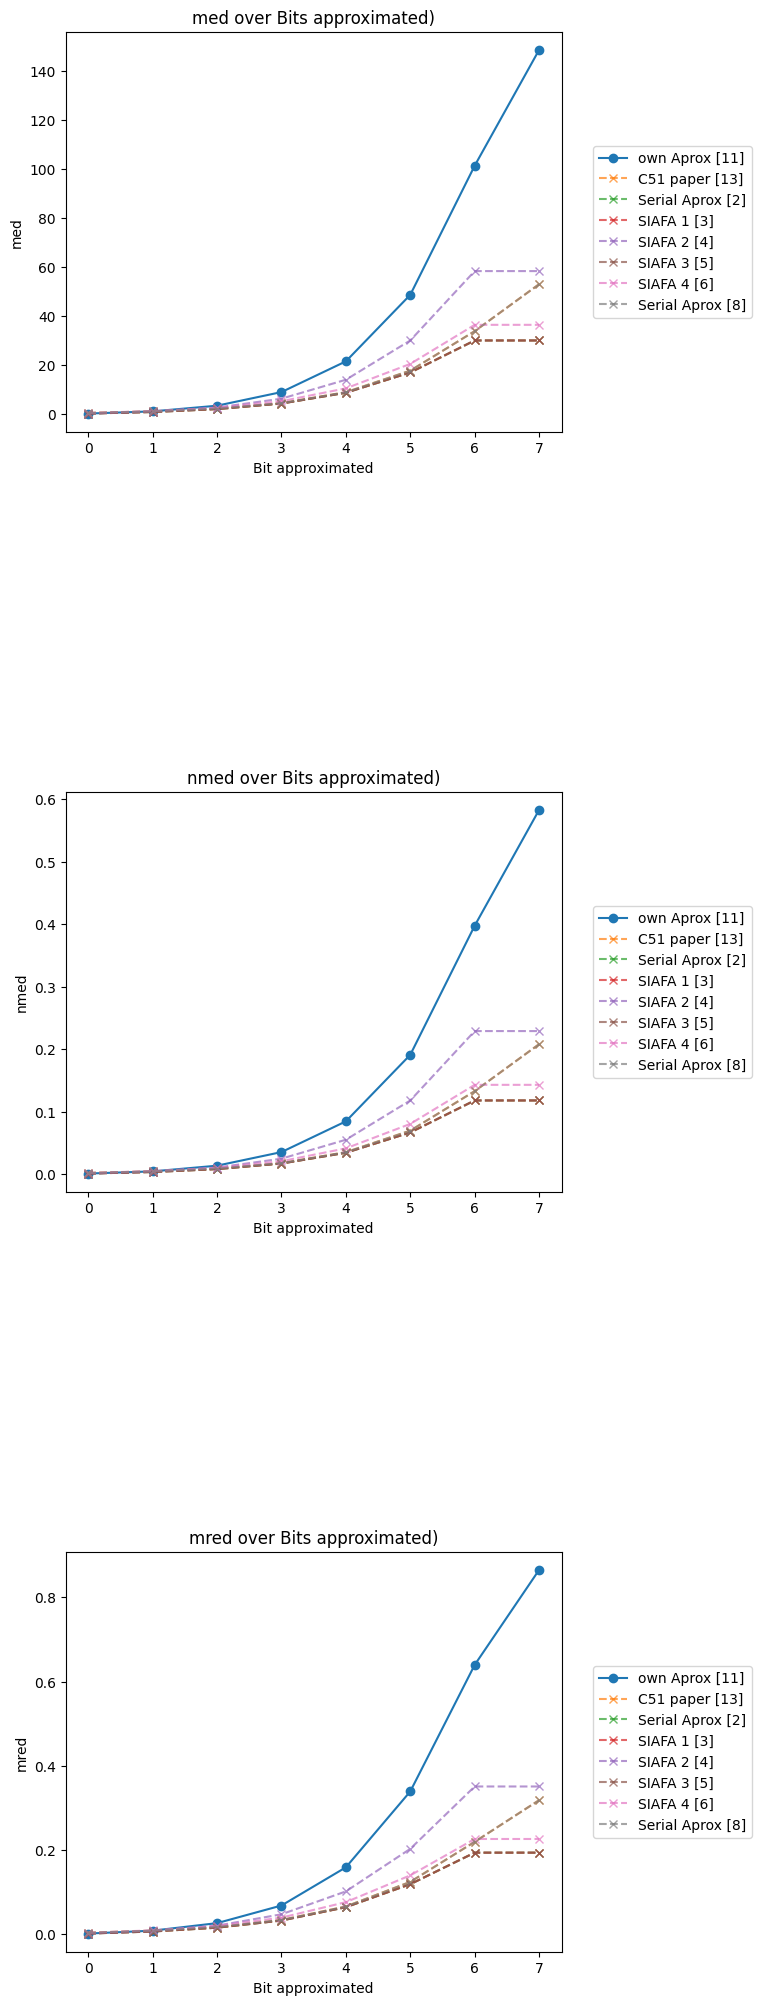

In [39]:
#error metrics list 
metrics_list = ["med", "nmed", "mred"]
rows = len(metrics_list)
coll = 1

fig, axs = plt.subplots(rows, coll )
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
for indexMetric, metric in enumerate(metrics_list):

    for indexalgo, algo in enumerate(list_algo):
        if 'own' in algo:
            axs[indexMetric].plot(loaded_dict[algo][metric], "o-", label=algo)
        else:
            if metric == 'energy_con' or 'exact' not in algo:
                axs[indexMetric].plot(loaded_dict[algo][metric], "x--", label=algo, alpha=0.7)

    if "ssi" in metric:
        axs[indexMetric].axhline(y=0.9, color='0.8', linestyle='-', label='90%')
    if "psnr" in metric:
        axs[indexMetric].axhline(y=30, color='0.8', linestyle='-', label='30dB')
    # if metric == 'nmed' or metric == 'mred':
        # axs[indexMetric].set_yscale('log')
    axs[indexMetric].set_title(f"{metric} over Bits approximated)")
    axs[indexMetric].set_xlabel("Bit approximated")
    axs[indexMetric].set_ylabel(f'{metric}')
    # axs[indexMetric].legend()
    axs[indexMetric].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()